In [3]:
import sys
sys.path.append('../src')

import redshift_cross_correlation as mrc
import redshift_cc_sdss as crs

In [6]:
template_spectra = crs.get_template_spectra('ALL')

Spectrum retrieved!

>> Best overall match: Template 023 with z = 0.13600, score = 5541.188


(23, np.float64(0.136), np.float64(5541.1875638147485))

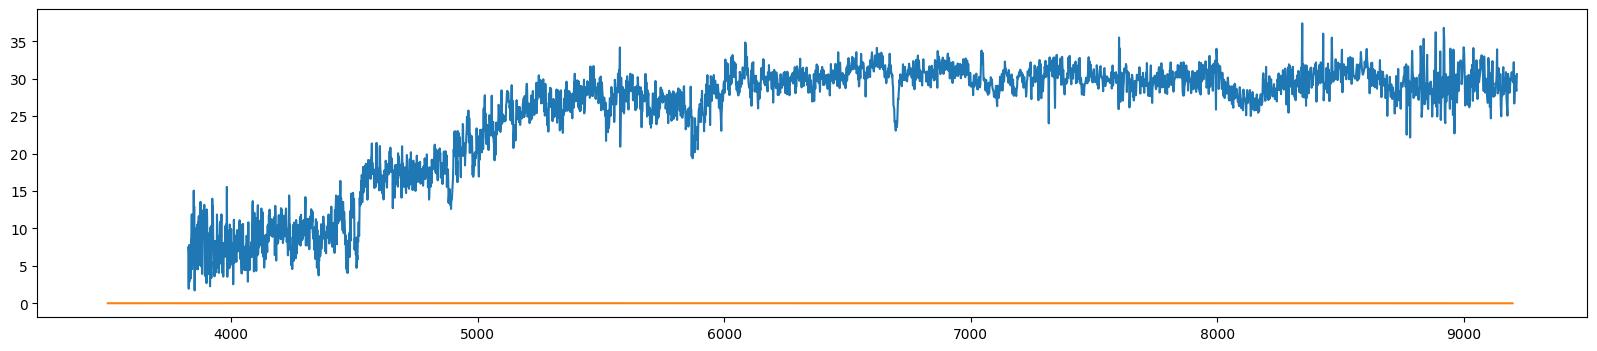

In [7]:
flux, wavelength = crs.get_spectrum()
mrc.cross_correlate_redshift(wavelength, flux, template_spectra)

In [ ]:
flux, wavelength = crs.get_spectrum(plate=266, mjd=51602, fiberID=9)
mrc.cross_correlate_redshift(wavelength, flux, template_spectra)


Spectrum retrieved!

>> Best overall match: Template 031 with z = 2.82000, score = 2979.766


(31, np.float64(2.8200000000000016), np.float64(2979.7659375170606))

In [ ]:
template_spectra = crs.get_all_template_spectra()
flux, wavelength = crs.get_spectrum(plate=309, mjd=51994, fiberID=568)
mrc.cross_correlate_redshift(wavelength, flux, template_spectra)
# Why is it doing this again. Fix later.


Spectrum retrieved!

>> Best overall match: Template 015 with z = 0.00000, score = 3438.516


(15, np.float64(0.0), np.float64(3438.51602294246))

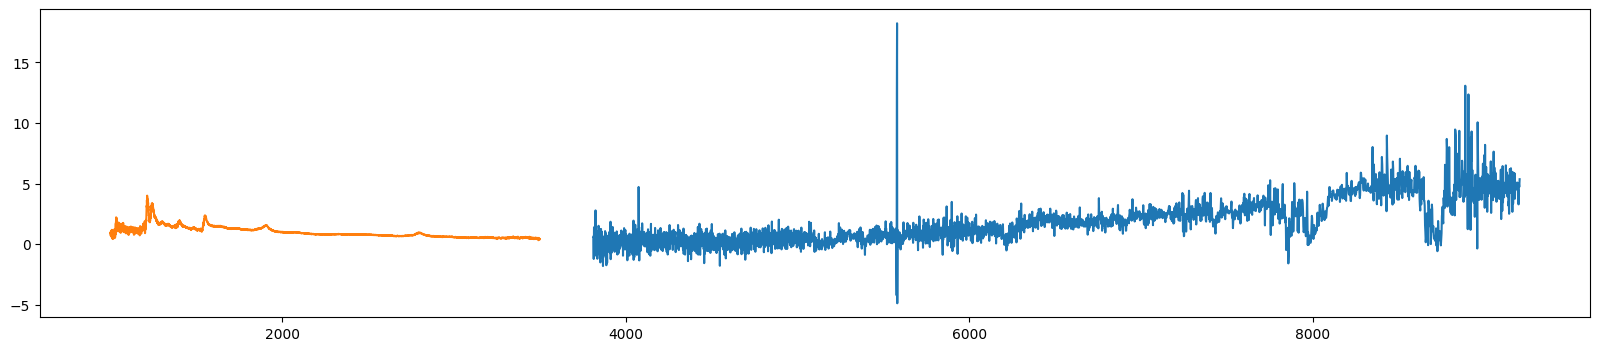

In [ ]:
import matplotlib.pyplot as plt

#This line had a redshift of over 5.5
# So template 15 is definitely not it..

plt.figure(figsize=(20,4))
plt.plot(wavelength, flux)
plt.plot(template_spectra[0][0], template_spectra[0][1])